# aDRAC-Dataset
**Archives des datations radiocarbone d'Afrique centrale**
* * *
*Dirk Seidensticker*

In [2]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os
sys.path.append("/Python")
from myfunctions import *

Very simple and fast inspection of the dataset:

In [3]:
df = pd.read_csv("../data/aDRAC.csv", encoding='utf8')
display(df.head())

,LABNR,C14AGE,C14STD,C13,MATERIAL,SITE,COUNTRY,FEATURE,FEATURE_DESC,LAT,LONG,SOURCE
0,AA-78447,2362,39,0.0,NaN,Mbaere,CAF,NaN,Pollencore,3.988639,16.924447,Kiahtipes/Lupo et al. 2011
1,AA-78448,2171,37,0.0,NaN,Mbaere,CAF,NaN,Pollencore,3.988639,16.924447,Kiahtipes/Lupo et al. 2011
2,AA-78449,834,35,0.0,NaN,Mbaere,CAF,NaN,Pollencore,3.988639,16.924447,Kiahtipes/Lupo et al. 2011
3,Arc-339,2310,60,0.0,Charcoal,Mont Brazza,GAB,NaN,NaN,NaN,NaN,Clist 2004/05
4,Arc-340,540,50,0.0,NaN,Mont Barnier,COG,NaN,NaN,-4.186390,15.200280,Pincon 1991


## Dates

How are the dates distributed?

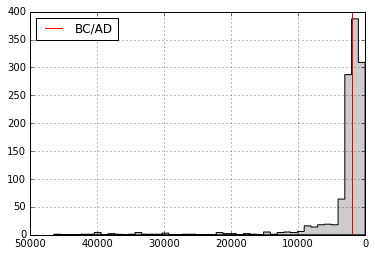

In [4]:
bins = df['C14AGE'].max() - df['C14AGE'].min()
df['C14AGE'].hist(color = 'grey', bins = round(bins/1000), histtype='stepfilled', fc='#CCCCCC').invert_xaxis()
plt.axvline(x = 1950, color='r', label = 'BC/AD')
legend = plt.legend(loc=2)
legend.get_frame().set_facecolor('white')

In [31]:
df['C14AGE'].describe()

count     1191.000000
mean      2989.182200
std       5330.920792
min          0.000000
25%        955.500000
50%       1870.000000
75%       2395.000000
max      46500.000000
Name: C14AGE, dtype: float64

Which sites deliver the most dates? (Top 10)

In [32]:
df_pivot = df.pivot_table(values = 'C14AGE', index = 'SITE', aggfunc = [len, np.min, np.mean, np.max])
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.sort_values(by=['len'], ascending=[False])
# display(df_pivot.head())
df_pivot[:10]

,SITE,len,amin,mean,amax
142,Gombe-Point,27,220,12564.444444,46500
12,Akonetye,22,1685,1825.954545,2429
370,Oboui,21,1615,2539.761905,3995
75,Bwambe-Sommet (Est),19,1760,2283.631579,2550
436,Shum Laka,18,40,3529.444444,8705
308,Mouanko-Lobethal,18,156,2434.333333,8913
434,Sanga,16,0,725.312500,1240
177,Kamoa,16,295,2386.250000,6025
80,Campo,15,1184,1771.933333,2000
375,Okala 1,15,440,4707.333333,39690


A distribution of the amounts of dates per site:

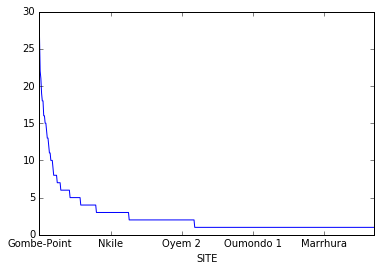

In [33]:
df_pivot.plot(x = 'SITE', y = 'len', legend=False)

In [34]:
df_pivot['len'].describe()

count    471.000000
mean       2.528662
std        3.165426
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       27.000000
Name: len, dtype: float64

How to get the amount of dates per site and feature:

In [35]:
df_pivot = df.pivot_table(values = 'C14AGE', index = ['SITE', 'FEATURE'], aggfunc = [len, np.min, np.mean, np.max])
df_pivot[:10]

len  amin         mean  amax
SITE          FEATURE                               
Abang Minko'o ABM 06/1    2  2236  2253.000000  2270
              ABM 06/2    4  2181  2228.500000  2286
Akonetye      AKO 04/2    2  1685  1727.500000  1770
              AKO 04/3    1  1755  1755.000000  1755
              AKO 05/2    3  1692  1749.333333  1787
              AKO 05/3    1  1747  1747.000000  1747
              AKO 05/4    2  1718  1718.500000  1719
              AKO 05/5    1  1815  1815.000000  1815
              AKO 05/6    5  1771  1959.400000  2429
              AKO 05/8    1  1779  1779.000000  1779

## Features

What kinds of features are represented within the dataset?

In [36]:
df.pivot_table(values = 'C14AGE', index = ['FEATURE_DESC'], aggfunc = len)

FEATURE_DESC
Burial               36
Deposit               2
Ditch                 1
Furnace              17
Geologic Profile      2
Pit                 149
Pollencore           11
Surface               2
Trench               50
Name: C14AGE, dtype: int64

## Geographical distribution

What area does the dataset cover?

As decimal degrees:

In [46]:
pd.Series({'X/LONG - Min':np.min(df['LONG']),
           'X/LONG - Max':np.max(df['LONG']),
           'Y/LAT - Min':np.min(df['LAT']),
           'Y/LAT - Max':np.max(df['LAT'])})

X/LONG - Max    30.683333
X/LONG - Min    -9.153600
Y/LAT - Max     18.361900
Y/LAT - Min    -15.270437
dtype: float64

As degree/minute/second:

In [47]:
pd.Series({'X/LONG - Min':decimalDegrees2DMS(np.min(df['LONG']), 'Longitude'),
           'X/LONG - Max':decimalDegrees2DMS(np.max(df['LONG']), 'Longitude'),
           'Y/LAT - Min':decimalDegrees2DMS(np.min(df['LAT']), 'Latitude'),
           'Y/LAT - Max':decimalDegrees2DMS(np.max(df['LAT']), 'Latitude')})

X/LONG - Max     30º 40' 59.99'' E
X/LONG - Min      -9º 9' 12.96'' W
Y/LAT - Max      18º 21' 42.84'' N
Y/LAT - Min     -15º 16' 13.57'' S
dtype: object

How many dates per country?

In [55]:
df_pivot = df.pivot_table(values = 'C14AGE', index = 'COUNTRY', aggfunc = [len])
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.sort_values(by=['len'], ascending=[False])
# display(df_pivot.head())
df_pivot

,COUNTRY,len
3,CMR,376
6,GAB,252
4,COD,179
5,COG,138
2,CAF,104
9,RWA,37
0,AGO,33
8,GNQ,19
1,BDI,12
10,TCD,3
